In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


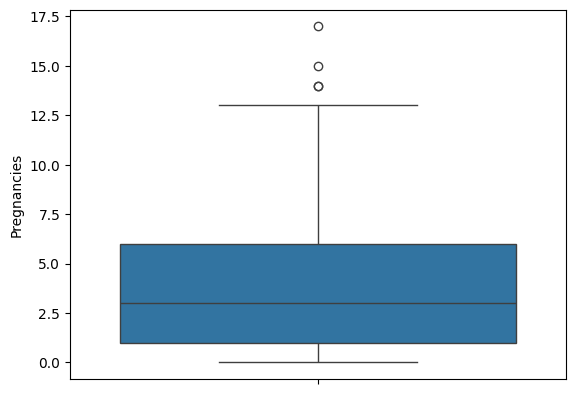

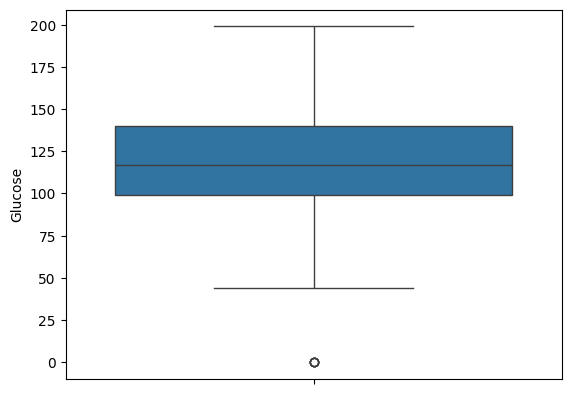

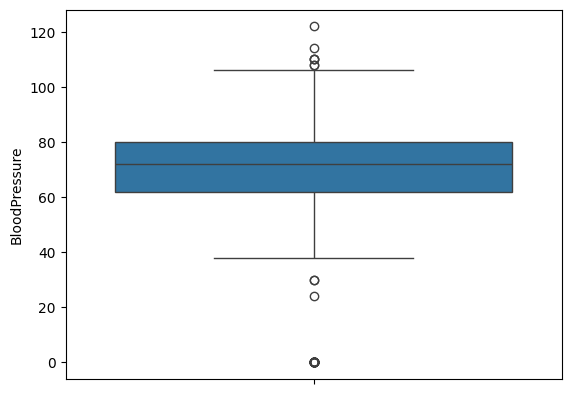

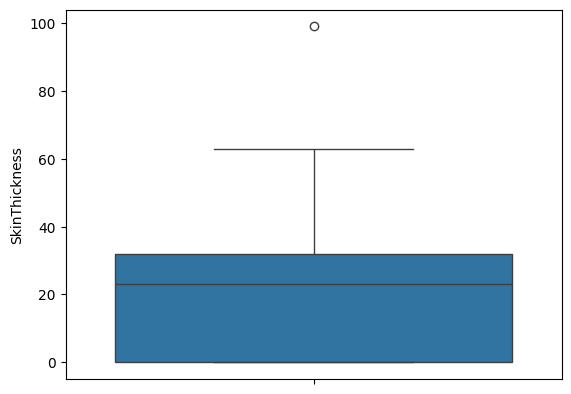

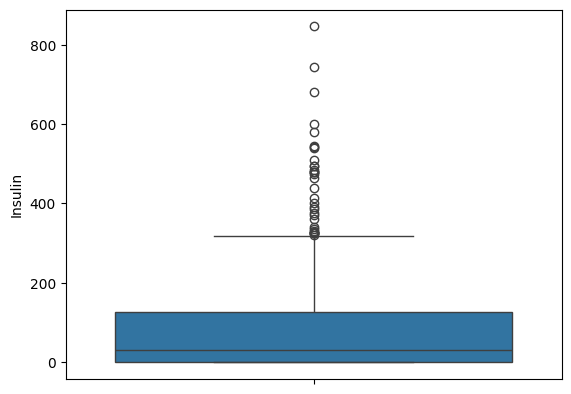

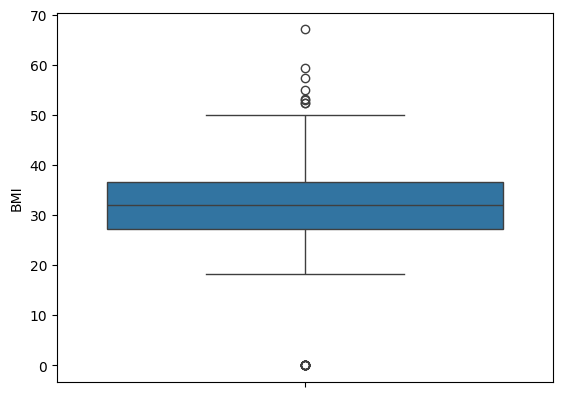

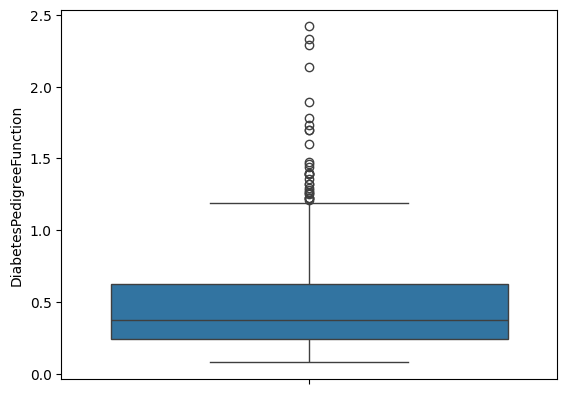

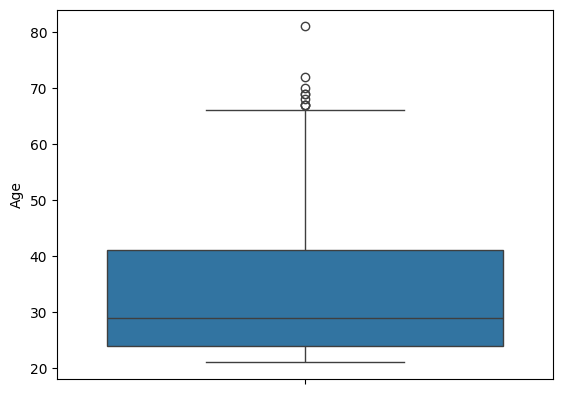

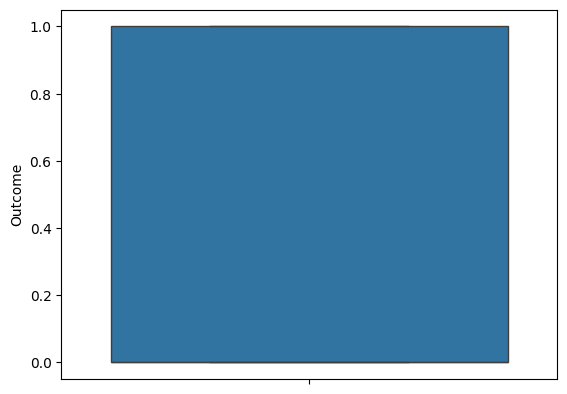

In [5]:
#We check for outliers using box plot for each attribute
data.describe()
#Drawing boxplot for each
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [6]:
#in the same way we remove outliers from each attribute using iqr
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
columns_to_clean = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    # Filter out the rows with outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in columns_to_clean:
    data = remove_outliers_iqr(data, col)
# Check the cleaned dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


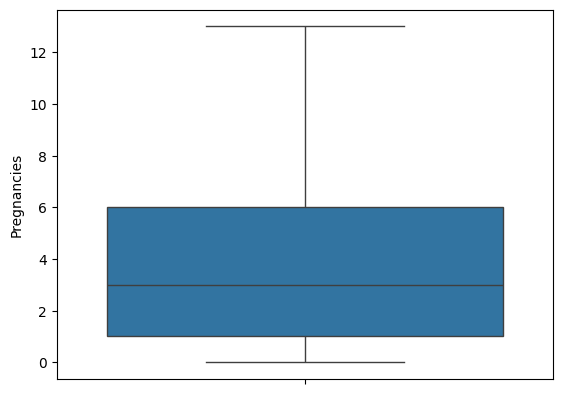

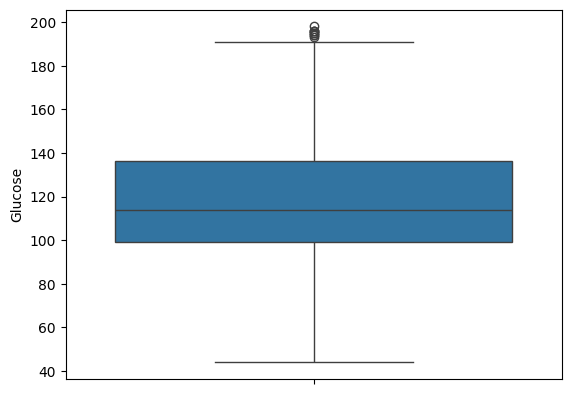

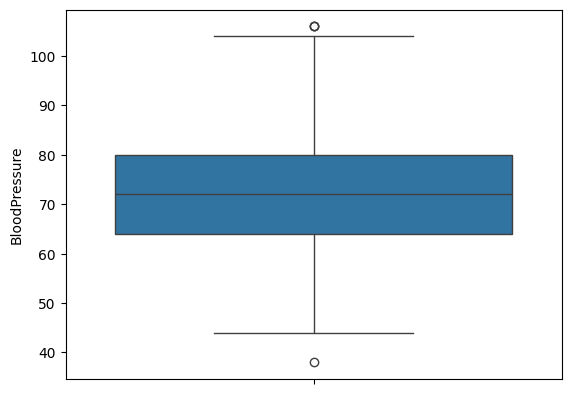

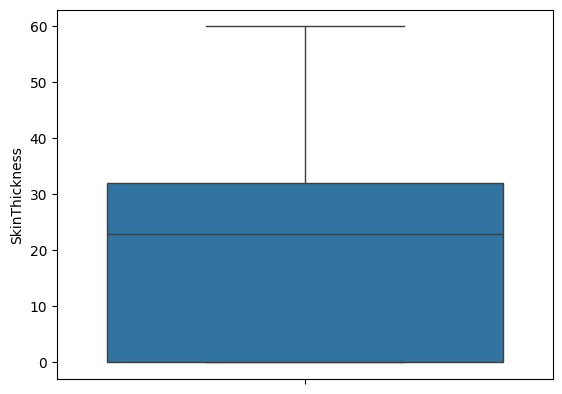

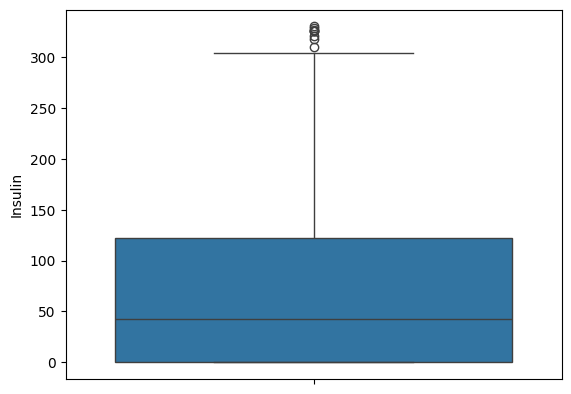

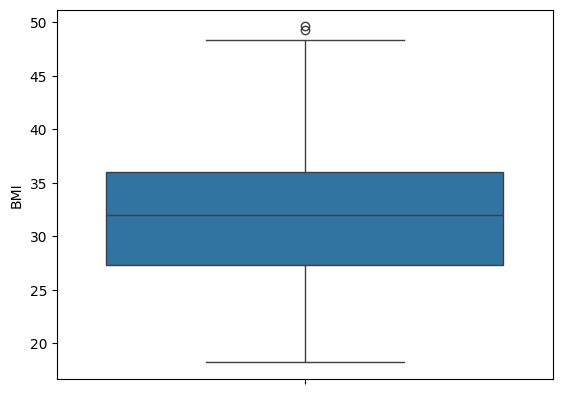

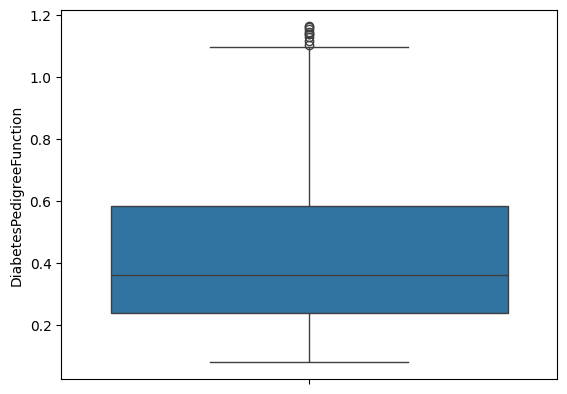

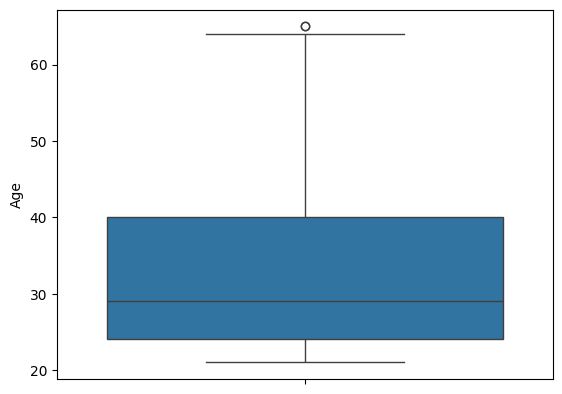

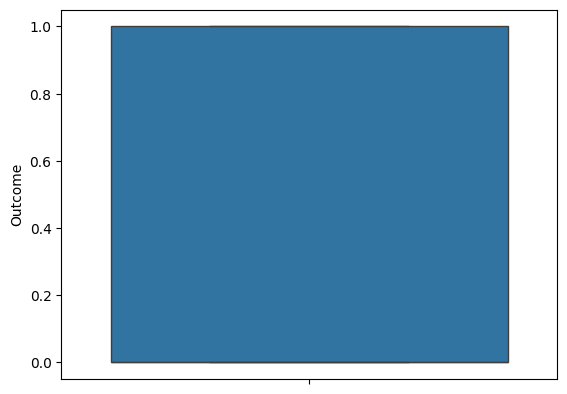

In [8]:
#Drawing boxplot for each
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [9]:
#We have succesfully removed outliers

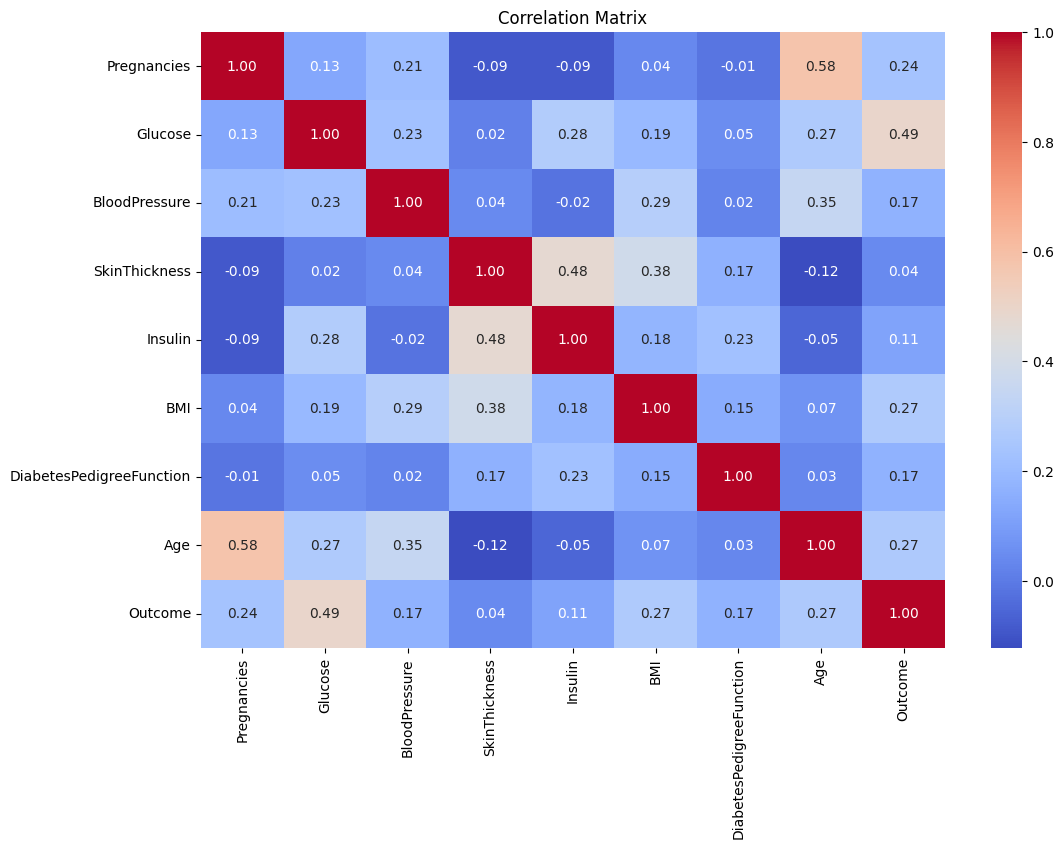

Features highly correlated with 'Survived': Index(['Outcome'], dtype='object')


In [10]:
#Now we do feature selection by using 3 tests
#1)Correlation matrix
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features (e.g., correlation > 0.8)
high_corr_features = corr_matrix.index[abs(corr_matrix["Outcome"]) > 0.5]
print(f"Features highly correlated with 'Survived': {high_corr_features}")

In [11]:
#Checking with respect to outcome
# Check correlation with the target variable (Survived)
target_corr = data.corr()['Outcome']
print(target_corr.sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.493355
BMI                         0.268268
Age                         0.267017
Pregnancies                 0.235631
BloodPressure               0.171178
DiabetesPedigreeFunction    0.168112
Insulin                     0.114653
SkinThickness               0.042490
Name: Outcome, dtype: float64


In [12]:
#2 using chi-square test
#Chi-square test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# For Chi-Square Test, you need to use numerical encoding for categorical columns
# Ensure features and target are encoded numerically
X = data.drop(['Outcome'], axis=1)  # Features
y = data['Outcome']  # Target

# Apply SelectKBest with Chi2 test to select top features
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)

# Display the feature scores
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi2_selector.scores_
}).sort_values(by='Chi-Square Score', ascending=False)

print(chi2_scores.sort_values(by='Chi-Square Score', ascending=False))

                    Feature  Chi-Square Score
1                   Glucose       1093.254462
4                   Insulin        845.311059
7                       Age        164.617840
0               Pregnancies         98.441333
5                       BMI         58.270927
2             BloodPressure         33.001442
3             SkinThickness         12.821335
6  DiabetesPedigreeFunction          2.529090


In [13]:
data.shape

(636, 9)

In [14]:
#3)The RFE (Recursive Feature Elimination)
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = pd.DataFrame(data, columns=data.columns)
y = data.Outcome

# Use Logistic Regression model for RFE
model = LogisticRegression(max_iter=500)

# Apply RFE
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Get the ranking of features
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,  # Use the columns from X
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(rfe_ranking)


                    Feature  Ranking
0               Pregnancies        1
1                   Glucose        1
5                       BMI        1
6  DiabetesPedigreeFunction        1
8                   Outcome        1
7                       Age        2
2             BloodPressure        3
3             SkinThickness        4
4                   Insulin        5


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Correlation data
correlation = {'Feature': ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure',
                           'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness'],
               'Correlation': [0.493355, 0.268268, 0.267017, 0.235631, 0.171178,
                               0.168112, 0.114653, 0.042490]}

# Chi-Square data
chi_square = {'Feature': ['Glucose', 'Insulin', 'Age', 'Pregnancies', 'BMI',
                          'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction'],
              'Chi-Square': [1093.254462, 845.311059, 164.617840, 98.441333,
                             58.270927, 33.001442, 12.821335, 2.529090]}

# RFE data
rfe = {'Feature': ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction',
                   'Outcome', 'Age', 'BloodPressure', 'SkinThickness', 'Insulin'],
       'Ranking': [1, 1, 1, 1, 1, 2, 3, 4, 5]}

# Create DataFrames
correlation_df = pd.DataFrame(correlation)
chi_square_df = pd.DataFrame(chi_square)
rfe_df = pd.DataFrame(rfe)

# Normalize the scores for correlation and chi-square
scaler = MinMaxScaler()
correlation_df['Correlation_Score'] = scaler.fit_transform(correlation_df[['Correlation']])
chi_square_df['Chi_Square_Score'] = scaler.fit_transform(chi_square_df[['Chi-Square']])

# Convert RFE rankings to scores (inverse of ranking)
rfe_df['RFE_Score'] = 1 / rfe_df['Ranking']

# Merge all scores
merged = correlation_df.merge(chi_square_df, on='Feature', how='outer')
merged = merged.merge(rfe_df, on='Feature', how='outer')

# Fill missing values with 0 (if any feature is missing in a specific test)
merged.fillna(0, inplace=True)

# Combine scores (weighted sum or mean)
merged['Combined_Score'] = (merged['Correlation_Score'] +
                            merged['Chi_Square_Score'] +
                            merged['RFE_Score'])

# Rank features based on the combined score
merged = merged.sort_values(by='Combined_Score', ascending=False)

# Display the ranked features
print(merged[['Feature', 'Combined_Score']])


                    Feature  Combined_Score
4                   Glucose        3.000000
1                       BMI        1.551872
7               Pregnancies        1.516313
3  DiabetesPedigreeFunction        1.278624
0                       Age        1.146598
5                   Insulin        1.132735
6                   Outcome        1.000000
2             BloodPressure        0.646696
8             SkinThickness        0.259436


In [16]:
print(data.head())
print(data.dtypes)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome        

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features to scale (exclude 'Outcome')
features_to_scale = ['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Insulin','BloodPressure','SkinThickness']

# Apply StandardScaler to the selected features
data_scaled = data.copy()  # Create a copy to preserve the original data
data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the first few rows of the scaled data
print(data_scaled.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.681426  1.005403      -0.000696       0.936596 -0.826197  0.256438   
1    -0.857590 -1.168963      -0.532036       0.542370 -0.826197 -0.840893   
2     1.297032  2.213384      -0.709149      -1.363054 -0.826197 -1.358207   
3    -0.857590 -1.030908      -0.532036       0.148145  0.299065 -0.605751   
5     0.373623 -0.099037       0.176417      -1.363054 -0.826197 -0.997655   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.819791  1.604688        1  
1                 -0.307223 -0.143041        0  
2                  1.003543 -0.051055        1  
3                 -1.058566 -1.062898        0  
5                 -0.919731 -0.235026        0  


In [18]:
#we select the features
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [19]:
#we split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(508, 8)
(128, 8)
(508,)
(128,)


In [21]:
#Now we select the models and predict the output
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [22]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)
print(accuracy_score(y_test,lr_pred))
#print(classification_report(y_test,lr_pred))

0.7265625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)
print(accuracy_score(y_test,dt_pred))


0.765625


In [24]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
print(accuracy_score(y_test,rf_pred))

0.7421875


In [25]:
#svm
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
print(accuracy_score(y_test,svm_pred))

0.7421875


In [26]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_pred=nb_model.predict(x_test)
print(accuracy_score(y_test,nb_pred))

0.6953125


In [27]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_pred=knn_model.predict(x_test)
print(accuracy_score(y_test,knn_pred))

0.7421875


In [28]:
#XGBOOST
#Using XG boost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb)*100)

71.875


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')  # Use scoring='roc_auc' for ROC AUC score
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.7734375  0.7480315  0.77165354 0.80314961 0.81889764]
Mean accuracy: 0.7830339566929133


In [30]:
# Example user input: [190,100,0 103, 37.7, 0.324, 55, 6]
user_input = np.array([[190, 100,0,103, 37.7, 0.324, 55, 6]])  # Wrap it in a 2D array

# Make a prediction
prediction = rf_model.predict(user_input)

# Print the prediction
print(prediction)


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
if prediction == 1:
        print("The model predicts that the person has diabetes.")
else:
    print("The model predicts that the person does not have diabetes.")

The model predicts that the person does not have diabetes.


In [32]:
#confusion matrix for each model
from sklearn.metrics import confusion_matrix
#confusion matrix for logistic regression
cm_lr=confusion_matrix(y_test,lr_pred)
print(cm_lr)

[[80 12]
 [23 13]]
